<a href="https://colab.research.google.com/github/ksejull/labs/blob/main/%D0%9B%D0%A08-9_%D0%9B%D1%83%D1%87%D0%B0%D0%BD%D1%96%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучанінова Ксенія, Група 2-8, Варіант 11

#Лабораторна робота №8

In [ ]:
import numpy as np

# Введення значень з таблиці
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

# Крок таблиці (рівномірний)
h = x_values[1] - x_values[0]

# Функція для обчислення таблиці кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]
    return delta_y

# Таблиця кінцевих різниць
delta_table = finite_differences(y_values)

# Виведення таблиці кінцевих різниць
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Знаходження індексу для x = 3.4
x_target = 3.4
index = np.where(x_values == x_target)[0][0]

# Значення кінцевих різниць для обчислення похідних у точці x = 3.4
delta_y1 = delta_table[index, 1]  # Δy1
delta2_y1 = delta_table[index, 2]  # Δ2y1
delta3_y1 = delta_table[index, 3]  # Δ3y1
delta4_y1 = delta_table[index, 4]  # Δ4y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1 + 11 * delta4_y1 / 12) / h**2

# Обчислення першої та другої похідної у точці x = 3.4
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округлення результатів до трьох знаків після коми
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виведення результатів
print(f"\nПерша похідна y'(3.4) ≈ {y1_prime}")
print(f"Друга похідна y''(3.4) ≈ {y1_double_prime}")


Таблиця кінцевих різниць:
[[ 3.526  0.256 -0.093  0.028 -0.    -0.001  0.001  0.    -0.003  0.01
  -0.025  0.056]
 [ 3.782  0.163 -0.065  0.028 -0.001 -0.     0.001 -0.003  0.007 -0.015
   0.031  0.   ]
 [ 3.945  0.098 -0.037  0.027 -0.001  0.001 -0.002  0.004 -0.008  0.016
   0.     0.   ]
 [ 4.043  0.061 -0.01   0.026  0.    -0.001  0.002 -0.004  0.008  0.
   0.     0.   ]
 [ 4.104  0.051  0.016  0.026 -0.001  0.001 -0.002  0.004  0.     0.
   0.     0.   ]
 [ 4.155  0.067  0.042  0.025  0.    -0.001  0.002  0.     0.     0.
   0.     0.   ]
 [ 4.222  0.109  0.067  0.025 -0.001  0.001  0.     0.     0.     0.
   0.     0.   ]
 [ 4.331  0.176  0.092  0.024  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 4.507  0.268  0.116  0.024  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 4.775  0.384  0.14   0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 5.159  0.524  0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 5.683  0.     0. 

In [ ]:
import numpy as np

# Таблиця значень функції
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

# Крок таблиці (рівномірний)
h = x_values[1] - x_values[0]

# Обчислення першої похідної за центральними різницями (крім крайніх точок)
first_derivative = np.zeros(len(y_values))
first_derivative[1:-1] = (y_values[2:] - y_values[:-2]) / (2 * h)

# Для крайніх точок обчислення односторонніх різниць
first_derivative[0] = (y_values[1] - y_values[0]) / h
first_derivative[-1] = (y_values[-1] - y_values[-2]) / h

# Обчислення другої похідної за центральними різницями (крім крайніх точок)
second_derivative = np.zeros(len(y_values))
second_derivative[1:-1] = (y_values[2:] - 2 * y_values[1:-1] + y_values[:-2]) / h**2

# Знаходження індексу для x = 3.4
x_target = 3.4
index = np.where(x_values == x_target)[0][0]

# Виведення результатів для x = 3.4
print("Перша похідна:")
print(f"x = {x_target}: {round(first_derivative[index], 3)}")
print("Друга похідна:")
print(f"x = {x_target}: {round(second_derivative[index], 3)}")


Перша похідна:
x = 3.4: 0.295
Друга похідна:
x = 3.4: 0.4


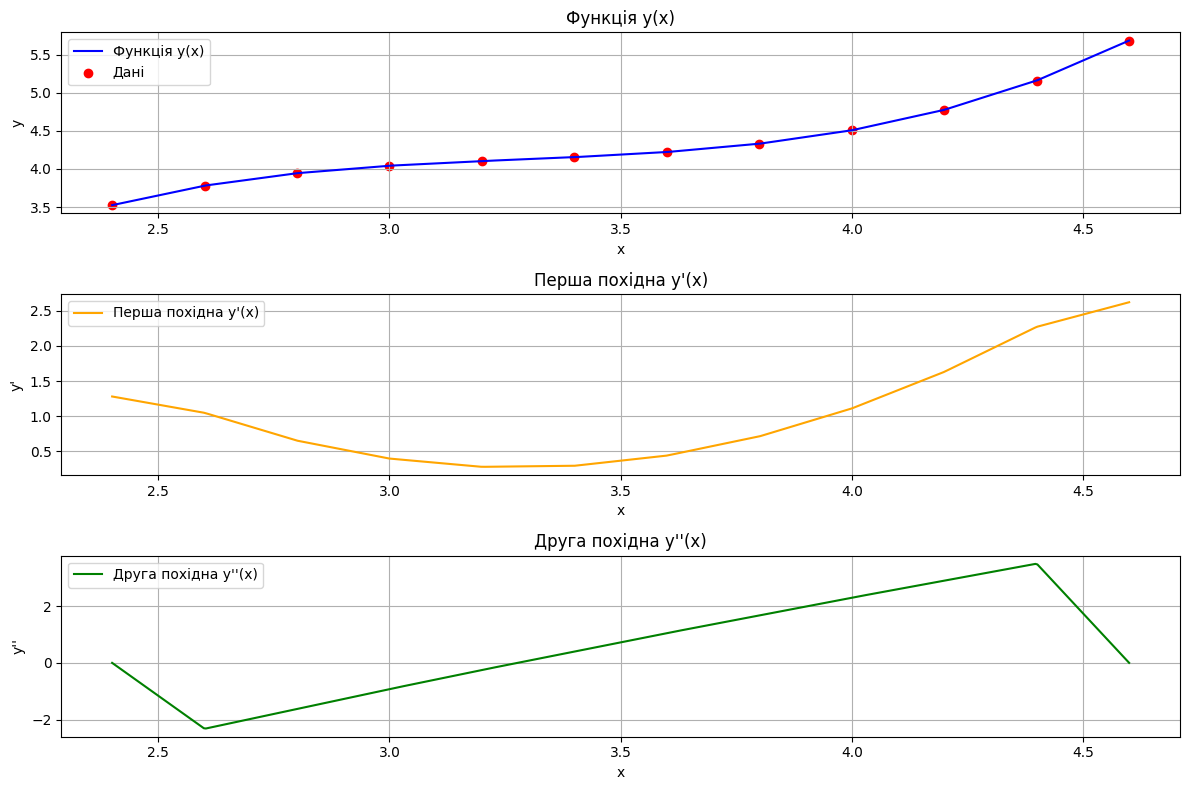

In [ ]:
import matplotlib.pyplot as plt

# Інтерполяція значень для побудови графіків
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислення першої та другої похідної для нових точок
first_deriv_fine = np.interp(x_fine, x_values, first_derivative)
second_deriv_fine = np.interp(x_fine, x_values, second_derivative)

# Створення графіків
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label="Функція y(x)", color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані')
plt.title("Функція y(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
plt.plot(x_fine, first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine, second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Лучанінова Ксенія, Група 2-8, Варіант 11

#Лабораторна робота №9

Відрізок 1:
S_0(x) = 2.39 + 9.0947(x - 1.4) + 0.0(x - 1.4)^2 + -44.8675(x - 1.4)^3, x належить [1.4, 1.6]
Відрізок 2:
S_1(x) = 3.85 + 3.7106(x - 1.6) + -26.9205(x - 1.6)^2 + 26.7662(x - 1.6)^3, x належить [1.6, 2.0]
Відрізок 3:
S_2(x) = 2.74 + -4.978(x - 2.0) + 5.1989(x - 2.0)^2 + 0.2342(x - 2.0)^3, x належить [2.0, 2.5]
Відрізок 4:
S_3(x) = 1.58 + 0.3966(x - 2.5) + 5.5502(x - 2.5)^2 + -3.0835(x - 2.5)^3, x належить [2.5, 3.1]


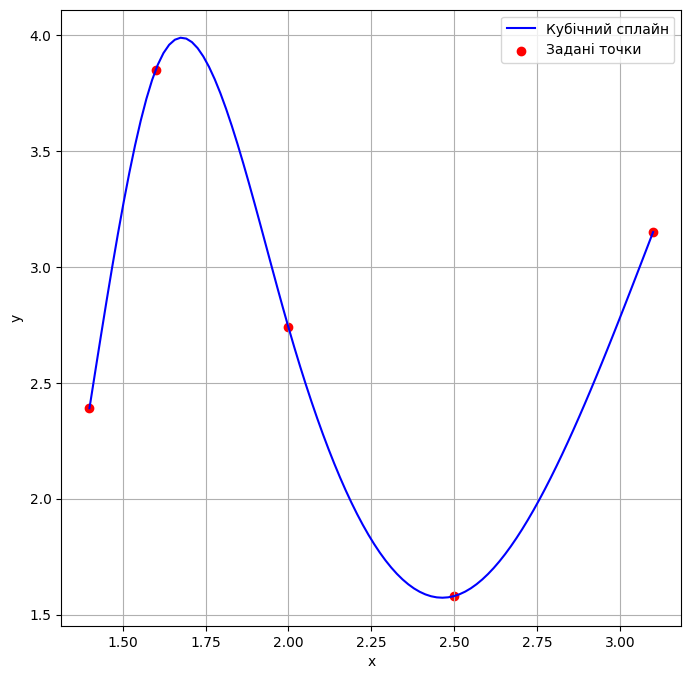

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Дані з таблиці
x = np.array([1.4, 1.6, 2.0, 2.5, 3.1])
y = np.array([2.39, 3.85, 2.74, 1.58, 3.15])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)
alpha = np.zeros(n)

# Обчислення alpha
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

# Ініціалізація l, mu, z
l = np.ones(n + 1)
mu = np.zeros(n)
z = np.zeros(n + 1)

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)
y_values = []

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='b')
plt.scatter(x, y, label="Задані точки", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


S_1(x) = 20.9723*(x - 1.4)^3 + -33.5695*(x - 1.4)^2 + 13.1750*(x - 1.4) + 2.3900
S_2(x) = 20.9723*(x - 1.6)^3 + -20.9861*(x - 1.6)^2 + 2.2639*(x - 1.6) + 3.8500
S_3(x) = 0.1920*(x - 2.0)^3 + 4.1806*(x - 2.0)^2 + -4.4583*(x - 2.0) + 2.7400
S_4(x) = 0.1920*(x - 2.5)^3 + 4.4687*(x - 2.5)^2 + -0.1337*(x - 2.5) + 1.5800


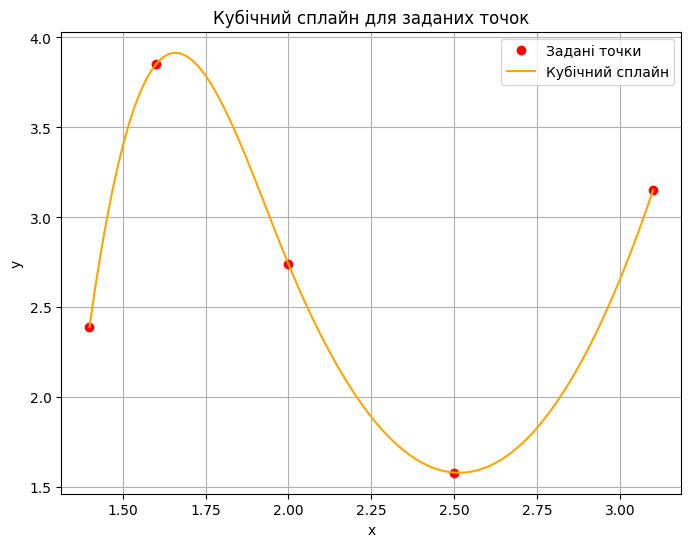

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([1.4, 1.6, 2.0, 2.5, 3.1])
y = np.array([2.39, 3.85, 2.74, 1.58, 3.15])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

# Генерація нових точок для побудови гладкого графіка сплайну
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Задані точки', color='red')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн для заданих точок')
plt.legend()
plt.grid(True)
plt.show()
